Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   InternetService   7043 non-null   object 
 2   OnlineSecurity    7043 non-null   object 
 3   OnlineBackup      7043 non-null   object 
 4   DeviceProtection  7043 non-null   object 
 5   TechSupport       7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   float64
 10  Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 660.3+ KB


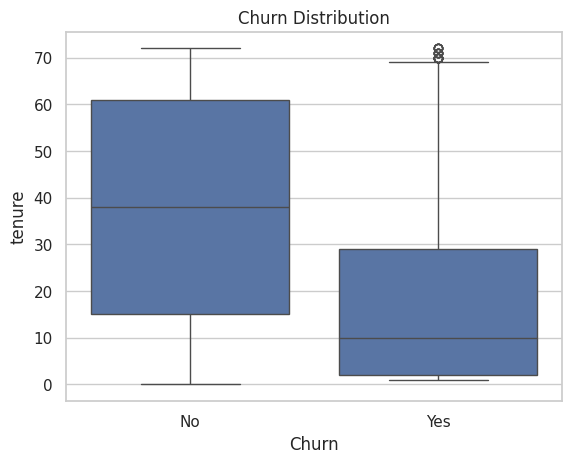

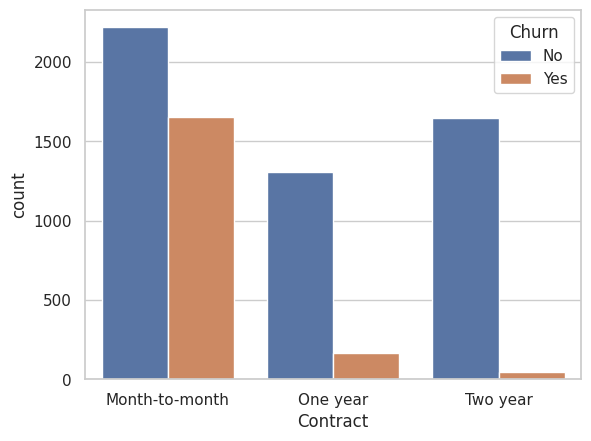

              precision    recall  f1-score   support

       False       0.85      0.90      0.88      1036
        True       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



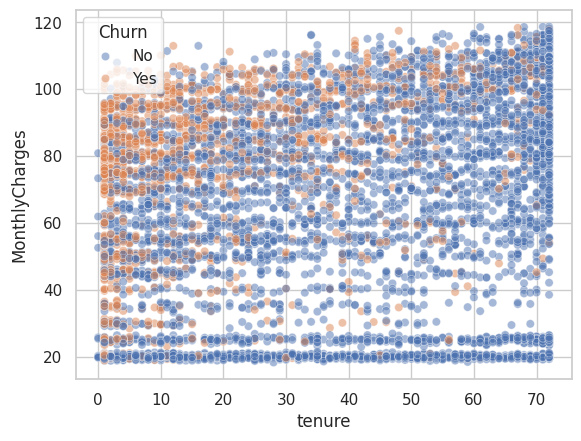

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# this is all the libraries that we need
from google.colab import drive
drive.mount('/content/drive')


sns.set(style="whitegrid")

file_path = "/content/drive/MyDrive/dataset.csv"

df = pd.read_csv(file_path, index_col="customerID")

# Reading the dataset and adjusting the index column


df.TotalCharges.value_counts()
df["TotalCharges"].dtype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#changing the datatype of the TotalCharges from object to float

df['TotalCharges'] = df["TotalCharges"].fillna(df["TotalCharges"].median())
#datacleaning
df.info()
df.isnull().sum()
# visualizing the relations
sns.boxplot(x="Churn", y="tenure",data=df)
plt.title("Churn Distribution")
plt.show()
df.groupby("Churn")["tenure"].median()
sns.countplot(x="Contract", hue="Churn", data=df)
plt.show()

# The scatter function graph
sns.scatterplot(
    x = "tenure",
    y = "MonthlyCharges",
    hue = "Churn",
    data = df,
    alpha = 0.5
)
df_encoded = pd.get_dummies(df,drop_first = True)
# one hot encoding
from sklearn.model_selection import train_test_split
x = df_encoded.drop("Churn_Yes",axis = 1)
y = df_encoded["Churn_Yes"]
df_encoded.columns
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
# Splitting the data for testing and training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)
# Using the logisticRegression model as classical model
model.fit(x_train,y_train)
# Training the model according the dataset
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# Printing the result



Level 1 and 2 is done.
I have used the LogisticRegression model.
visualization of the relations is done.
The accuracy average is around 81%.
F1 score is also mentioned there in the result



